In [13]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers.core import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.applications.inception_v3 import InceptionV3
import shutil
import os
import pandas as pd
from PIL import Image
from keras.models import Model 
import tensorflow as tf
import keras
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dense
from keras.layers.core import Dropout 
from keras.layers.core import Flatten
from keras.models import Sequential
from keras.models import model_from_json
from keras.callbacks import LearningRateScheduler 
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.utils import np_utils
import glob         
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import cv2
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore") 
import mymodule
from mymodule import BatchGenerator
from mymodule import Make_Raw_List2
from mymodule import plot_loss_accuracy_graph
import shutil
import os

In [2]:
#get the path
root_ori=os.getcwd()
root_ori

'/Users/ziyingye/Desktop/stats/stats402/data/Fundus_Diagnosis-master'

In [3]:
os.makedirs(root_ori+'/img_cate')

In [4]:
#create a foler
root_cate=root_ori+'/img_an'
root_cate

'/Users/ziyingye/Desktop/stats/stats402/data/Fundus_Diagnosis-master/img_an'

In [5]:
df=pd.read_csv('data.csv')
df

,filename,ID,age,sex,LR,AMD,RVO,Gla,MH,DR,RD,RP,AO,DM
0,000000_00.jpg,3090,78,M,L,0,0,0,0,0,0,0,0,0
1,000000_01.jpg,3090,78,M,R,0,0,0,0,0,0,0,0,0
2,000001_00.jpg,2702,76,F,L,0,0,0,0,0,0,0,0,0
3,000001_01.jpg,2702,76,F,R,0,0,0,0,0,0,0,0,0
4,000001_02.jpg,1136,69,M,L,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13042,005387_01.jpg,3657,73,F,L,0,0,0,0,0,0,0,0,0
13043,005387_02.jpg,173,73,F,R,0,0,0,0,0,0,0,0,0
13044,005387_03.jpg,3156,71,F,R,0,0,0,0,0,0,0,0,0
13045,005388_00.jpg,3156,71,F,L,0,0,0,0,0,0,0,0,0


In [6]:
#label the normal and abnormal fundus images in the dataset 
#1: healthy, 0:abnormal
def health(x):
    if x!=0:
        a=0
    else:
        a=1
    return a

def unhealth(x):
    if x!=0:
        a=1
    else:
        a=0
    return a

In [7]:
#label the normal and abnormal fundus images in the dataset 
df['HE_on']=df['AMD']+df['RVO']+df['Gla']+df['MH']+df['DR']+df['RD']+df['RP']+df['AO']+df['DM']
df['HE']=df['HE_on'].apply(lambda x: health(x))
# df['unHE']=df['HE_on'].apply(lambda x: unhealth(x))
df

,filename,ID,age,sex,LR,AMD,RVO,Gla,MH,DR,RD,RP,AO,DM,HE_on,HE
0,000000_00.jpg,3090,78,M,L,0,0,0,0,0,0,0,0,0,0,1
1,000000_01.jpg,3090,78,M,R,0,0,0,0,0,0,0,0,0,0,1
2,000001_00.jpg,2702,76,F,L,0,0,0,0,0,0,0,0,0,0,1
3,000001_01.jpg,2702,76,F,R,0,0,0,0,0,0,0,0,0,0,1
4,000001_02.jpg,1136,69,M,L,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13042,005387_01.jpg,3657,73,F,L,0,0,0,0,0,0,0,0,0,0,1
13043,005387_02.jpg,173,73,F,R,0,0,0,0,0,0,0,0,0,0,1
13044,005387_03.jpg,3156,71,F,R,0,0,0,0,0,0,0,0,0,0,1
13045,005388_00.jpg,3156,71,F,L,0,0,0,0,0,0,0,0,0,0,1


In [60]:
#create different folers
os.makedirs(root_cate+'/train')
os.makedirs(root_cate+'/train/NE')
os.makedirs(root_cate+'/train/AE')
os.makedirs(root_cate+'/test')
os.makedirs(root_cate+'/test/NE')
os.makedirs(root_cate+'/test/AE')

In [61]:
df1=df.loc[df['HE']==1]
df2=df.loc[df['HE']!=1]
print(df1.shape)
print(df2.shape)

(4364, 16)
(8683, 16)


In [62]:
#healthy/unhealthy train_test split, store in different folers
df1 = df1.sample(frac = 1)
n1=int((len(df1))*0.2) 
for i in range(len(df1)):
    img_name=df1.iloc[i,0]
    if i<n1:
        shutil.copy(root_ori+'/img/'+img_name, root_cate+'/test/NE')
    else:
        shutil.copy(root_ori+'/img/'+img_name, root_cate+'/train/NE')
        
df2 = df2.sample(frac = 1)
n2=int((len(df2))*0.2)
for i in range(len(df2)):
    img_name=df2.iloc[i,0]
    if i<n2:
        shutil.copy(root_ori+'/img/'+img_name, root_cate+'/test/AE')
    else:
        shutil.copy(root_ori+'/img/'+img_name, root_cate+'/train/AE')

In [8]:
#load the training data
img_height=256
img_width=256
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  root_cate+'/train',
  validation_split=0.25,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10439 files belonging to 2 classes.
Using 7830 files for training.


2022-12-14 01:52:11.025537: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
#load the validation data
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  root_cate+'/train',
  validation_split=0.25,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10439 files belonging to 2 classes.
Using 2609 files for validation.


In [10]:
#load the test data
test_ds=tf.keras.preprocessing.image_dataset_from_directory(
  root_cate+'/test',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2608 files belonging to 2 classes.


In [11]:
#build the Inception V3 model
model = InceptionV3(include_top=False, input_shape=(img_height, img_width, 3))
flat1 = Flatten()(model.output)
class1 = Dense(32, activation='relu')(flat1)
output = Dense(2, activation='softmax')(class1)
model = Model(inputs=model.inputs, outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [14]:
#train the model
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])
history = model.fit(train_ds, validation_data=val_ds, epochs=5)

Epoch 1/5
245/245 [==============================] - 5182s 21s/step - loss: 0.5020 - accuracy: 0.7404 - val_loss: 0.4670 - val_accuracy: 0.7589
Epoch 2/5
245/245 [==============================] - 5125s 21s/step - loss: 0.3682 - accuracy: 0.8234 - val_loss: 0.4896 - val_accuracy: 0.7861
Epoch 3/5
245/245 [==============================] - 5185s 21s/step - loss: 0.2741 - accuracy: 0.8783 - val_loss: 0.4624 - val_accuracy: 0.7831
Epoch 4/5
245/245 [==============================] - 5164s 21s/step - loss: 0.2186 - accuracy: 0.9050 - val_loss: 0.5609 - val_accuracy: 0.7903
Epoch 5/5
245/245 [==============================] - 5145s 21s/step - loss: 0.1643 - accuracy: 0.9327 - val_loss: 0.6587 - val_accuracy: 0.8053


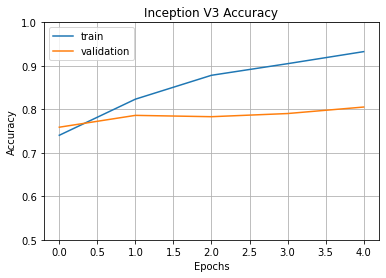

In [21]:
# plot the trend of training and validation accuracy
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.5,ymax=1)
plt.grid()
plt.title('Inception V3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show() 

In [16]:
#save the model
model.save('best_model_path_an_IV3.h5')

In [17]:
#load the saved trained the model
test_model = keras.models.load_model('best_model_path_an_IV3.h5')

In [18]:
#predict the test data
df_p=pd.DataFrame(test_model.predict(test_ds))
df_p

82/82 [==============================] - 277s 3s/step


,0,1
0,0.800207,1.997929e-01
1,0.995346,4.654397e-03
2,0.997904,2.095864e-03
3,0.998736,1.264169e-03
4,0.999658,3.421457e-04
...,...,...
2603,0.998798,1.202171e-03
2604,0.816659,1.833414e-01
2605,0.999073,9.274787e-04
2606,1.000000,2.782320e-07


In [19]:
#add the original label as the last column in the dataframe
test_label = np.concatenate([y for x, y in test_ds], axis=0) 
df_l=pd.DataFrame(test_label)
df_l
pd.concat([df_p,df_l],axis=1)

,0,1,0
0,0.800207,1.997929e-01,0
1,0.995346,4.654397e-03,0
2,0.997904,2.095864e-03,0
3,0.998736,1.264169e-03,0
4,0.999658,3.421457e-04,0
...,...,...,...
2603,0.998798,1.202171e-03,1
2604,0.816659,1.833414e-01,0
2605,0.999073,9.274787e-04,1
2606,1.000000,2.782320e-07,0


In [20]:
#evaluate the model
model.evaluate(test_ds)

82/82 [==============================] - 278s 3s/step - loss: 0.6910 - accuracy: 0.7937


[0.6909915208816528, 0.7937116622924805]

In [21]:
#create the model, used to plot the architecture of the model
def construct_model():
    model = InceptionV3(include_top=False, input_shape=(512, 512, 3))
    # add new classifier layers
    flat1 = Flatten()(model.output)
    class1 = Dense(32, activation='relu')(flat1)
    output = Dense(2, activation='softmax')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])
    return model

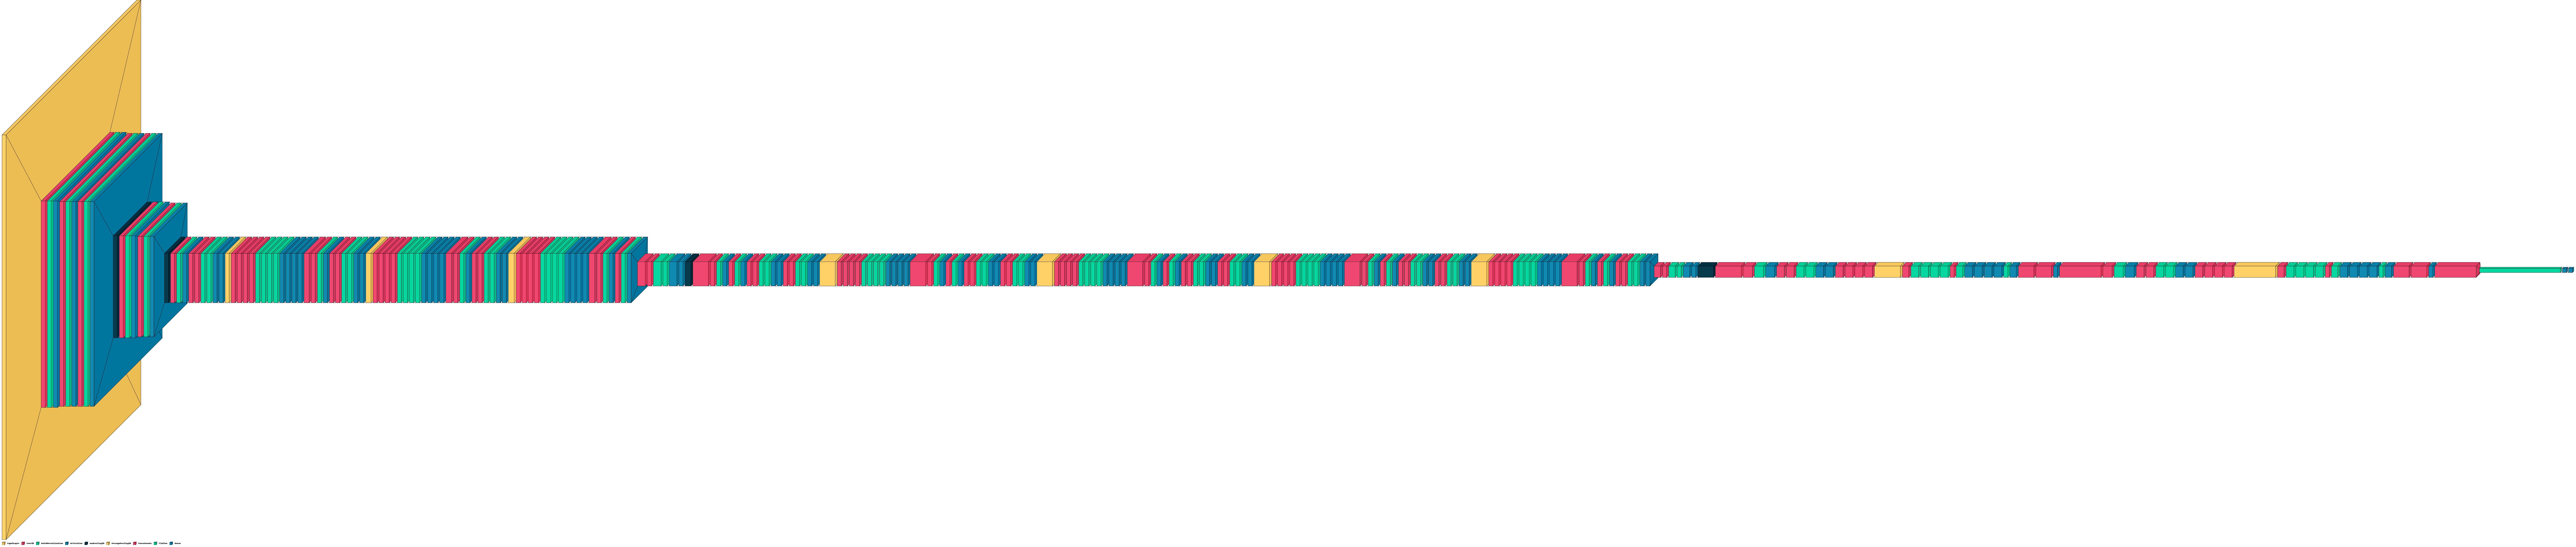

In [23]:
#plot the architecture of the model
import visualkeras
model=construct_model()
from PIL import ImageFont
visualkeras.layered_view(model, legend=True)